In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import ADASYN
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv')

In [3]:
y_train = y_train.drop(columns=['match']).values.ravel()
y_test = y_test.drop(columns=['match']).values.ravel()

In [5]:
X_train = X_train.drop(X_train.loc[:,'attr':'shar1_1'].head(0).columns, axis=1)
X_test = X_test.drop(X_test.loc[:,'attr':'shar1_1'].head(0).columns, axis=1)

# Logistic Regression

In [6]:
params = {'penalty': ['l1', 'l2', 'elasticnet'],
          'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
          'max_iter': [3000]}

gscv = GridSearchCV(LogisticRegression(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\scipy\opti

{'max_iter': 3000, 'penalty': 'l2', 'solver': 'liblinear'}

In [32]:
lr = LogisticRegression(max_iter=3000, penalty='l2', solver='liblinear')
lr.fit(X_train,y_train).score(X_test, y_test)

0.5817422434367542

In [33]:
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.46


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.46')

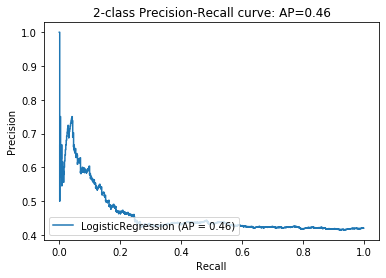

In [34]:
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [35]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,gender,-0.051000
1,age,-0.000382
2,age_o,-0.000382
3,int_corr,0.113517
4,samerace,-0.038757
5,date,0.022953
6,exphappy,0.009488
7,attr3_1,-0.037866
8,sinc3_1,-0.000275
9,fun3_1,0.004455


# Support Vector Machine

In [11]:
# This ran for almost an hour

# params = {'C': [.1, 1, 10],
#           'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# gscv = GridSearchCV(SVC(), params, cv=3)
# gscv.fit(X_train, y_train)
# gscv.best_params_

In [12]:
svc = SVC(C=10, kernel='poly')
svc.fit(X_train,y_train).score(X_test, y_test)

0.5805489260143198

In [13]:
y_score = svc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.43


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.43')

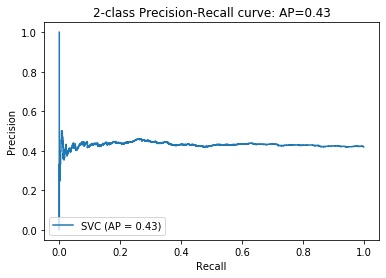

In [14]:
disp = plot_precision_recall_curve(svc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# k-Nearest Neighbor

In [15]:
params = {'n_neighbors': [3, 5, 10],
          'p': [1, 2]}

gscv = GridSearchCV(KNeighborsClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'n_neighbors': 10, 'p': 1}

In [16]:
knn = KNeighborsClassifier(n_neighbors=10, p=1)
knn.fit(X_train, y_train).score(X_test, y_test)

0.5465393794749404

# Decision Tree

In [17]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [3, 5, 7, 10, 12, 15, 25]}

gscv = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [36]:
dtc = DecisionTreeClassifier(max_depth=3, criterion='gini')
dtc.fit(X_train,y_train).score(X_test, y_test)

0.581145584725537

# Random Forest

In [19]:
params = {'n_estimators': [10, 50, 100, 150, 200],
          'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 25, 40, 60]}

gscv = GridSearchCV(RandomForestClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 150}

In [37]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=150)
rfc.fit(X_train,y_train).score(X_test, y_test)

0.581145584725537

Average precision-recall score: 0.42


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.42')

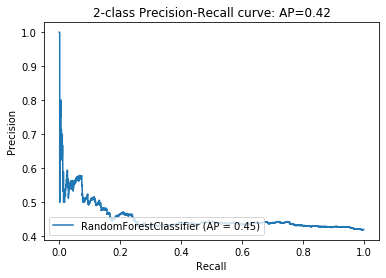

In [38]:
y_score = rfc.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(rfc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Gradient Boosting

In [22]:
params = {'n_estimators': [10, 50, 100, 150, 200],
          'max_depth': [5, 10, 25, 40, 60]}

gscv = GridSearchCV(GradientBoostingClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [39]:
gbc = GradientBoostingClassifier(max_depth=5, n_estimators=10)
gbc.fit(X_train,y_train).score(X_test, y_test)

0.5769689737470167

Average precision-recall score: 0.43


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.43')

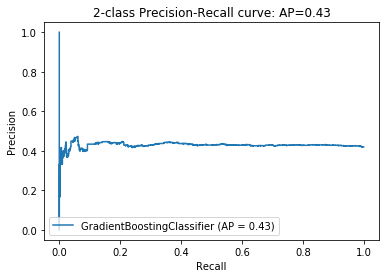

In [40]:
y_score = gbc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(gbc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# XGBoost

In [25]:
params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [3, 5, 10]}

gscv = GridSearchCV(XGBClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

{'max_depth': 3, 'n_estimators': 50}

In [41]:
xgb = XGBClassifier(max_depth=3, n_estimators=50)
xgb.fit(X_train, y_train).score(X_test, y_test)

0.5871121718377088

Average precision-recall score: 0.43


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.43')

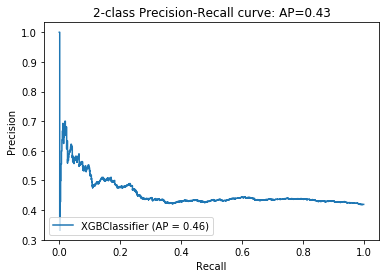

In [42]:
y_score = xgb.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(xgb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Stacking

In [28]:
ensemble = [LogisticRegression(max_iter=2000),GaussianNB(),KNeighborsClassifier()]
stc = StackingClassifier(ensemble,LogisticRegression(max_iter=2000))
stc.fit(X_train,y_train).score(X_test, y_test)

0.5471360381861575

# Oversampling

In [29]:
X_train_r, y_train_r = ADASYN().fit_sample(X_train, y_train)

In [43]:
xgb = XGBClassifier(max_depth=3, n_estimators=50)
xgb.fit(X_train_r,y_train_r).score(X_test, y_test)

0.581145584725537

Average precision-recall score: 0.43


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.43')

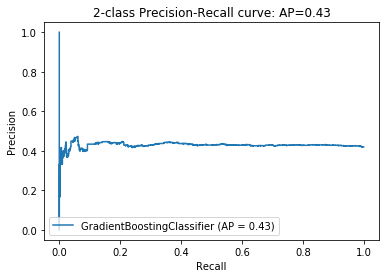

In [44]:
y_score = gbc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(gbc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))